<h2>Unit 10 Live Session </center> </h2>
<h4> W203 Instructional Team </h4>

#### Simple Linear Regression
<center>![title](regression.png)</center>

#### Class Announcements
1. Announcement 1
2. Announcement 2
3. Announcement 3

#### 1.0  Simple Linear Regression

Suppose we have data, represented by ($X_1$, $Y_1$), . . . , ($X_n$, $Y_n$).

** 1.1 **  Let $u_i$ be an error term, write a simple regression model for the $i^{th}$ observation.

$$
Y_i = \beta_0 + \beta_1X_i + u_i
$$

** 1.2 ** In words, what do the statistical errors $u_i$ represent ?

> Error term $u_i$ represents the variation in $Y$ which is not explanable by this model for a given value of $X$. $Y$ and $X$ have a joint distribution meaning that for a fixed value of $X$, $Y$ takes on more than one value so it makes sense that  $Y$ is not a deterministic function of $X$.

** 1.3 ** What assumption(s) are needed in order to interpret $\beta_0 + \beta_1X_i$ as a conditional expectation?

> We must assume that $E(u|X) = 0$, in doing so we get the following

$$ 
\begin{aligned}
E(Y|X) &= E(\beta_0 + \beta_1X + u|X) \\
&= \beta_0 + \beta_1X + E(u|X) \\
&= \beta_0 + \beta_1X
\end{aligned}
$$

> Interpretation of the coefficients is given by this representation, in addition to providing for the existence and uniqueness of the solution.

** 1.4 ** Do we want the residuals $\hat{u}_i = Y_i - \hat{\beta}_0 + \hat{\beta}_1X_i$ to be small in magnitude? Why or why not?

> We want residuals to be small because they represent the difference between the estimated model and data $Y_i$. The smaller the residuals are, the better the fit $\hat{\beta}_o + \hat{\beta}_1X_i$ is to $Y_i$

** 1.5 ** To define a regression line, is it sufficient to require $\sum \hat{u_i} = 0$?

> No in the method of moments framework we must require that both

$$ \sum_{i=1}^n \hat{u}_i = 0 \;\;\;\;\;\; \text{ and } \;\;\;\;\;\; \sum_{i=1}^nX_i\hat{u}_i =    0 $$

#### 2.0 Properties of residuals

We derive our estimator for $\beta_0$ and $\beta_1$  by setting our sample moments equal to their theoretical values 

** 2.1 ** What are the implications of the following properties?
1. $n^{-1}\sum_{i=1}^n \hat{u_i} = 0$.

2. $n^{-1}\sum_{i=1}^n X_i \hat{u_i} = 0$ 

> These equations can be used to define an estimator for $\beta_0$ and $\beta_1$.*
$$
\begin{aligned}
n^{-1}\sum_{i=1}^n \hat{u}_i &= n^{-1}\sum_{i=1}^n(Y_i - \hat{\beta}_o - \hat{\beta}_1X_i ) = 0  \\ 
n^{-1}\sum_{i=1}^nX_i\hat{u}_i &= n^{-1}\sum_{i=1}^n X_i(Y_i - \hat{\beta}_o - \hat{\beta}_1X_i) =    0 
\end{aligned}$$
> *which in purely algebraic terms gives us two equations and two unknowns.

** 2.2 ** How many different lines through the X-Y plane would fulfill these two conditions?

> Only one provided that the $X_i$'s are not all equal to a constant.

#### 3.0 Regression in R
When a linear pattern is evident from a scatter plot, the relationship between the two variables is often modeled with a straight line. This line is expressed in a linear model between the response (or dependent) variable and the predictor (or independent) variable.

The following functions are useful for running a linear regression in R.

- Fitting a model: model <- lm(y ~ x)
- Coefficients: model\$coef or coef(model)
- Fitted values: model$fitted or fitted(model)
- Residuals: model\$resid or resid(model)

Install and load the BSDA pacakge using the commands install.packages("BSDA") and library(BSDA),respectively.

We are interested in using the GPA data frame, which we can attach using the command: attach(Gpa), to investigate the impact of high school GPA on college GPA.

Before we can find the least square regression line, we need to determine the explanatory and response varibles. Define 2 new variables in R, x and Y, and assign the explanatory and response variables from the dataset, respectively, and conduct a cursory analysis of the data set. 

     HSGPA          CollGPA     
 Min.   :2.000   Min.   :1.400  
 1st Qu.:2.425   1st Qu.:2.250  
 Median :2.650   Median :2.650  
 Mean   :2.710   Mean   :2.700  
 3rd Qu.:3.100   3rd Qu.:3.325  
 Max.   :3.400   Max.   :3.800  

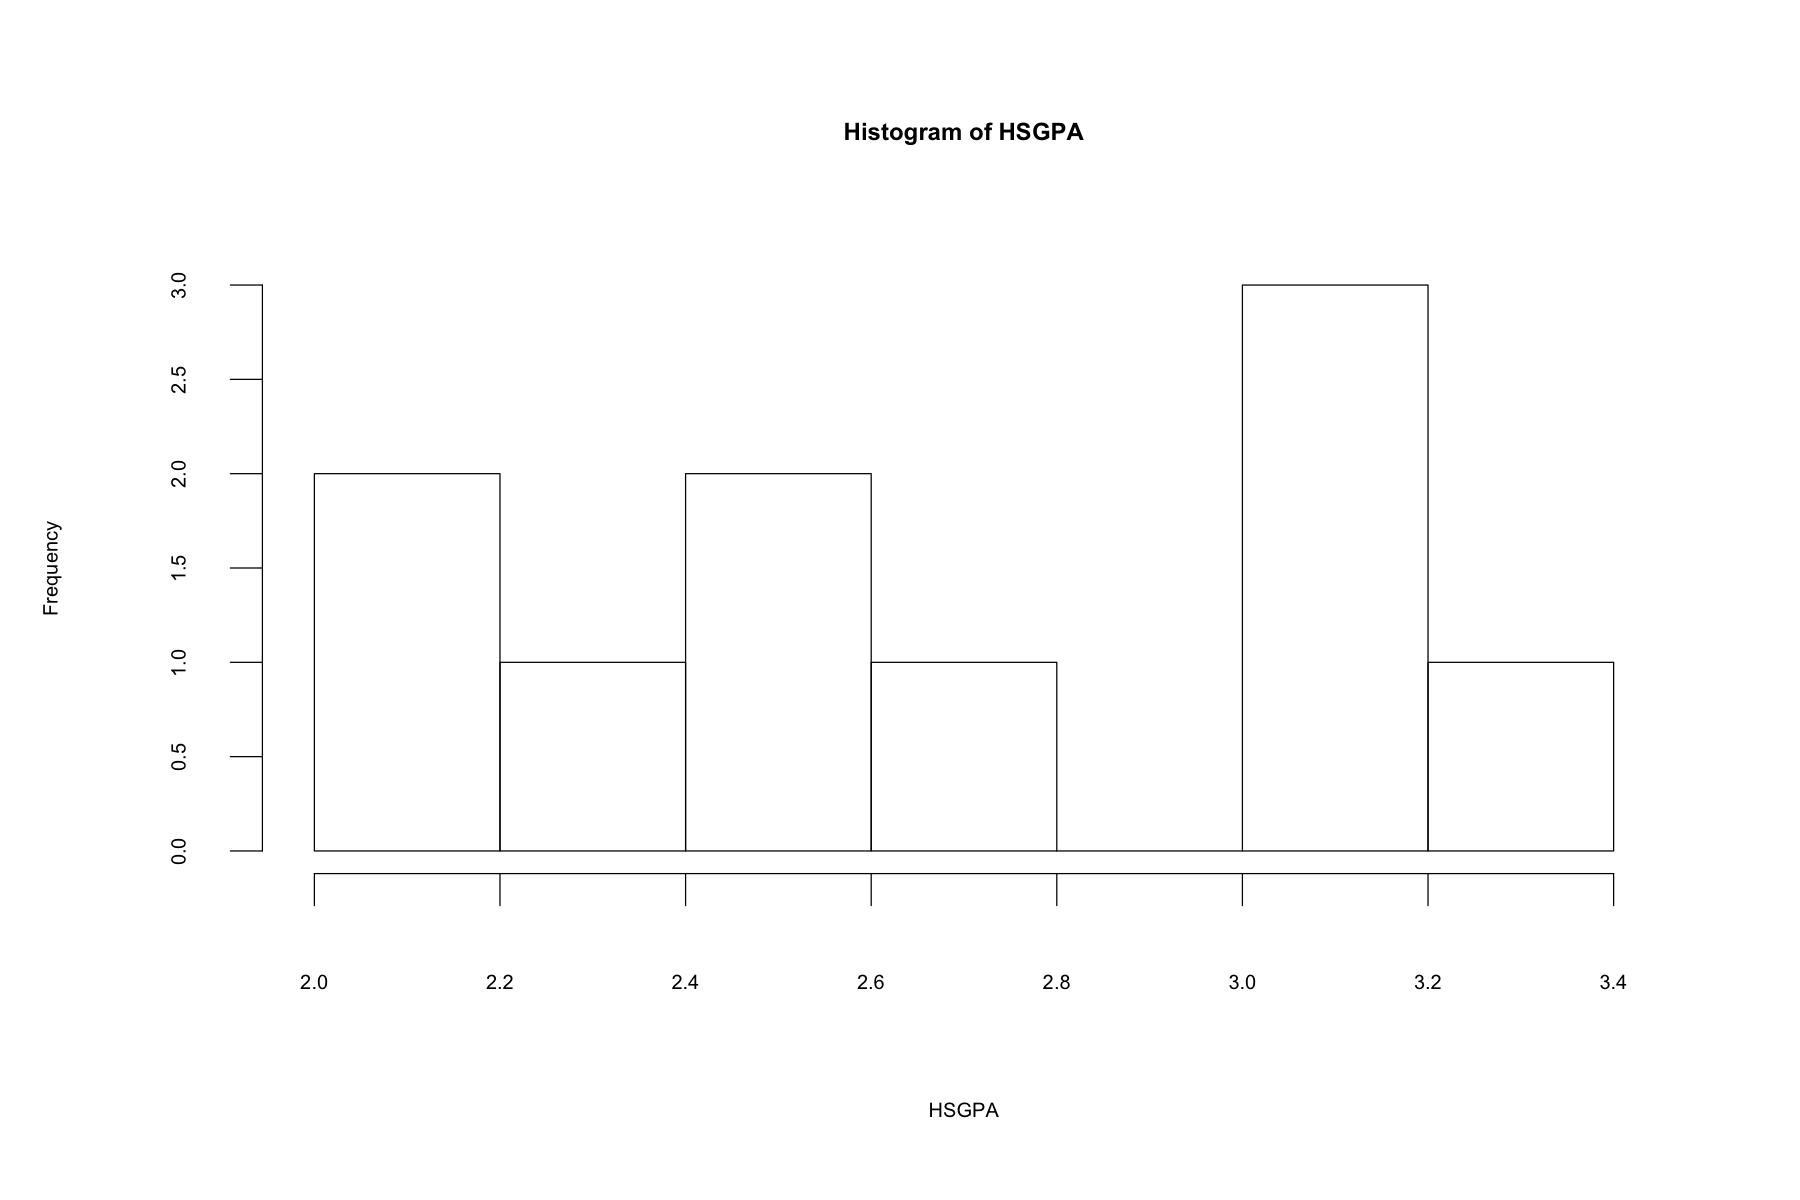

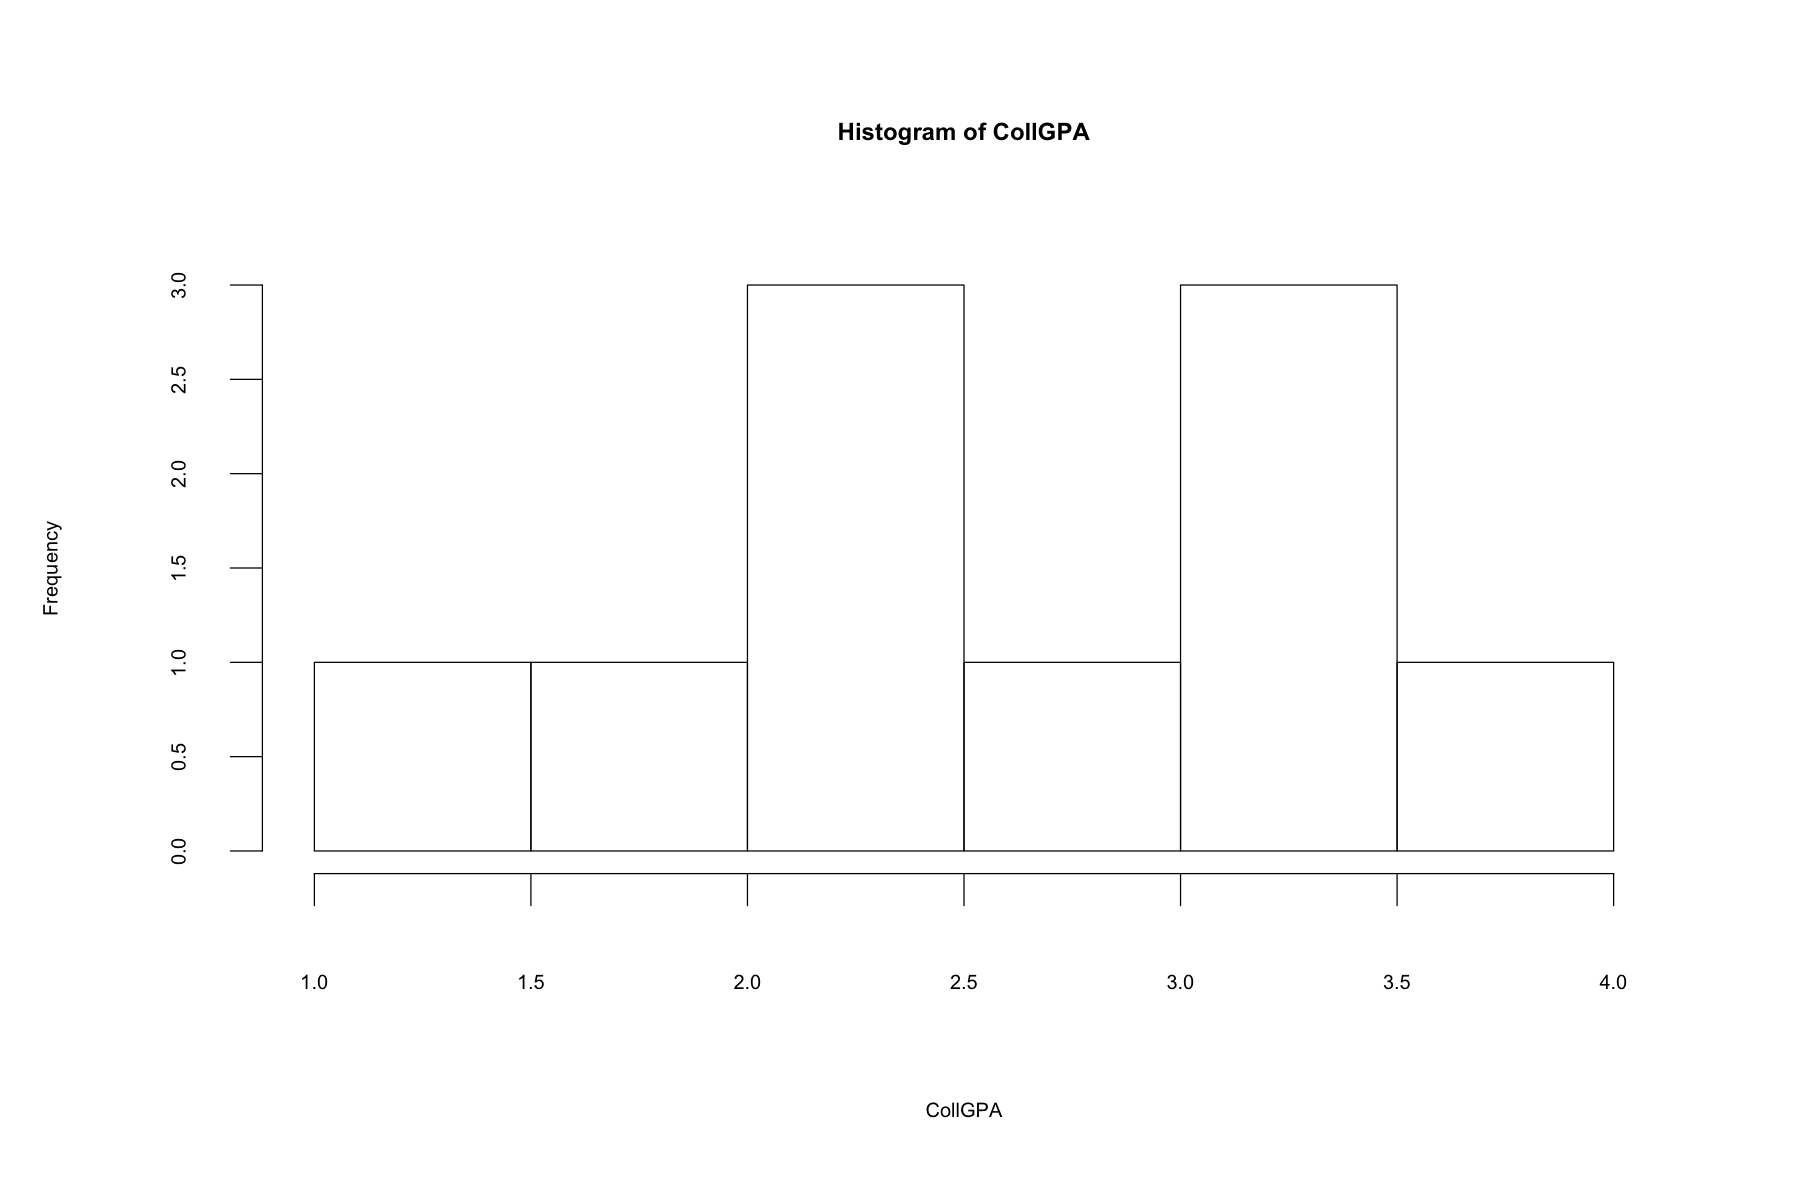

In [1]:
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 32)
load('Gpa.Rdata')
attach(Gpa)
summary(Gpa)
hist(HSGPA) 
hist(CollGPA)
Y <- CollGPA
x <- HSGPA

** 3.1 ** Create a scatterplot of CollGPA versus HSGPA and find the correlation between the two variables. What can we infer from the correlation?

[1] "cor(X,Y) = 0.843923054795065"

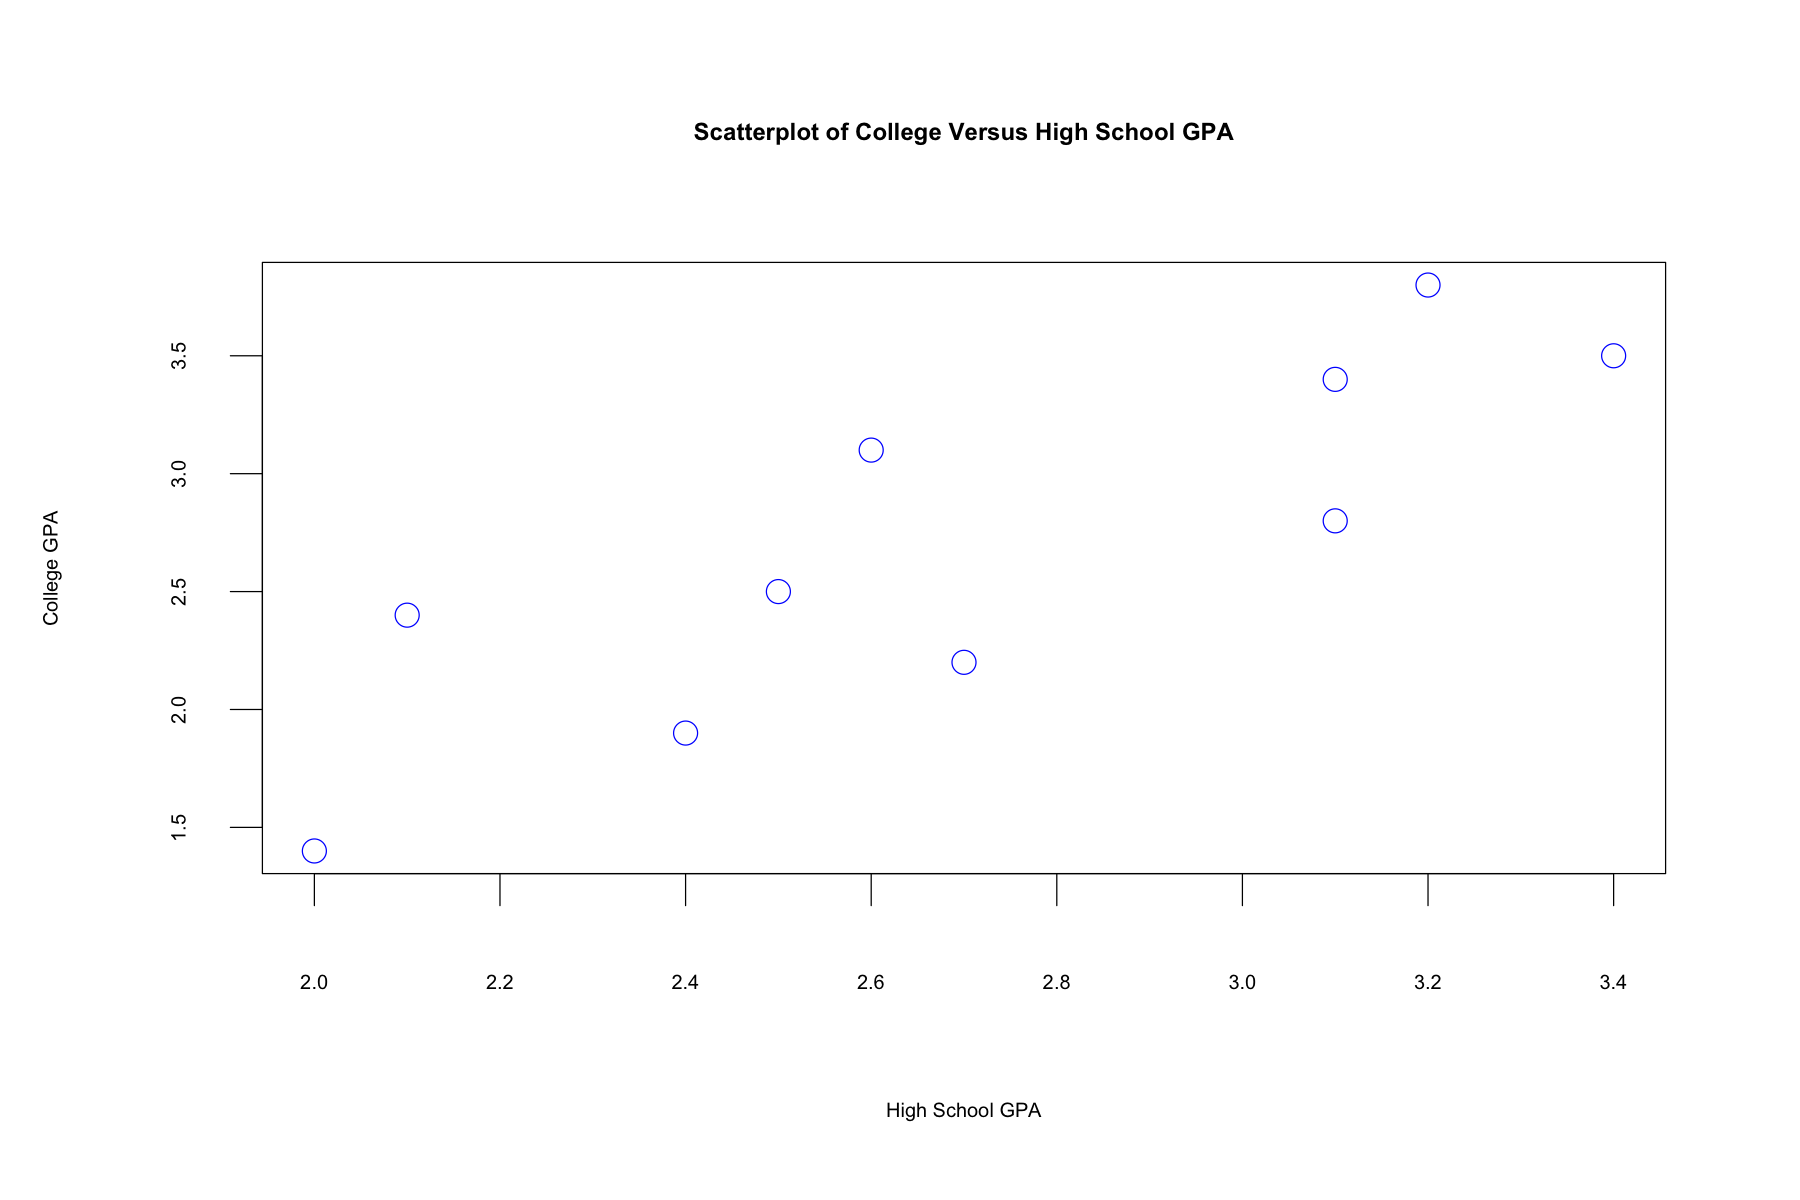

In [2]:
plot(x, Y, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
paste('cor(X,Y) =', cor(x,Y))

** 3.2 ** Now that we know a few things about the data, we want to find a line that best represents the relationship between the variables. In other words, we want to draw a slope that comes closest to describing the data.

Characterize the equation mathematically. Find the least squares estimates of $\beta_0$ and $\beta_1$. Corresponding to the model. 
$$ CollGPA = \beta_0 + \beta_1\cdot HSGPA$$


$$\hat{\beta}_0 = \bar{Y}-\hat{\beta}_1\bar{X} \hspace{1cm} \text{ and } \hspace{1cm} 
\hat{\beta}_1 = \frac{\sum_{i=1}^{n}(X_{i}-\bar{X})({Y_{i}-\bar{Y})}}{\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}} $$

In [3]:
b1 <- sum( (x-mean(x))*(Y-mean(Y)) ) / sum( (x-mean(x))^2)
b0 <- mean(Y)-b1*mean(x)
paste('Beta_0: ', b0)
paste('Beta_1: ', b1)

[1] "Beta_0:  -0.950366032210834"

[1] "Beta_1:  1.34699853587116"

** Note: ** To perform the least square regression is R we can use the lm command. If you are interested use the help(lm) command to learn the different options for using this function. To relationship between the variables is defined in the lm command using a tilde ("~") between the vector containing the response variable and the vector containing the explanatory variable: lm(Y ~ x).

If you would like to know what else is stored in the variable you can use the attributes command: attributes(). 

** 3.3 ** Find the least squares estimates of $\beta_0$ and $\beta_1$ using the R
function lm().

In [4]:
model <- lm(Y ~ x)
coef(model)

(Intercept)           x 
  -0.950366    1.346999

** 3.4 ** abline() adds one or more straight lines to the current plot. The arguments to abline() are a=b0 and b=b1. Add the least squares line to the scatterplot created in 1 using the R function abline()

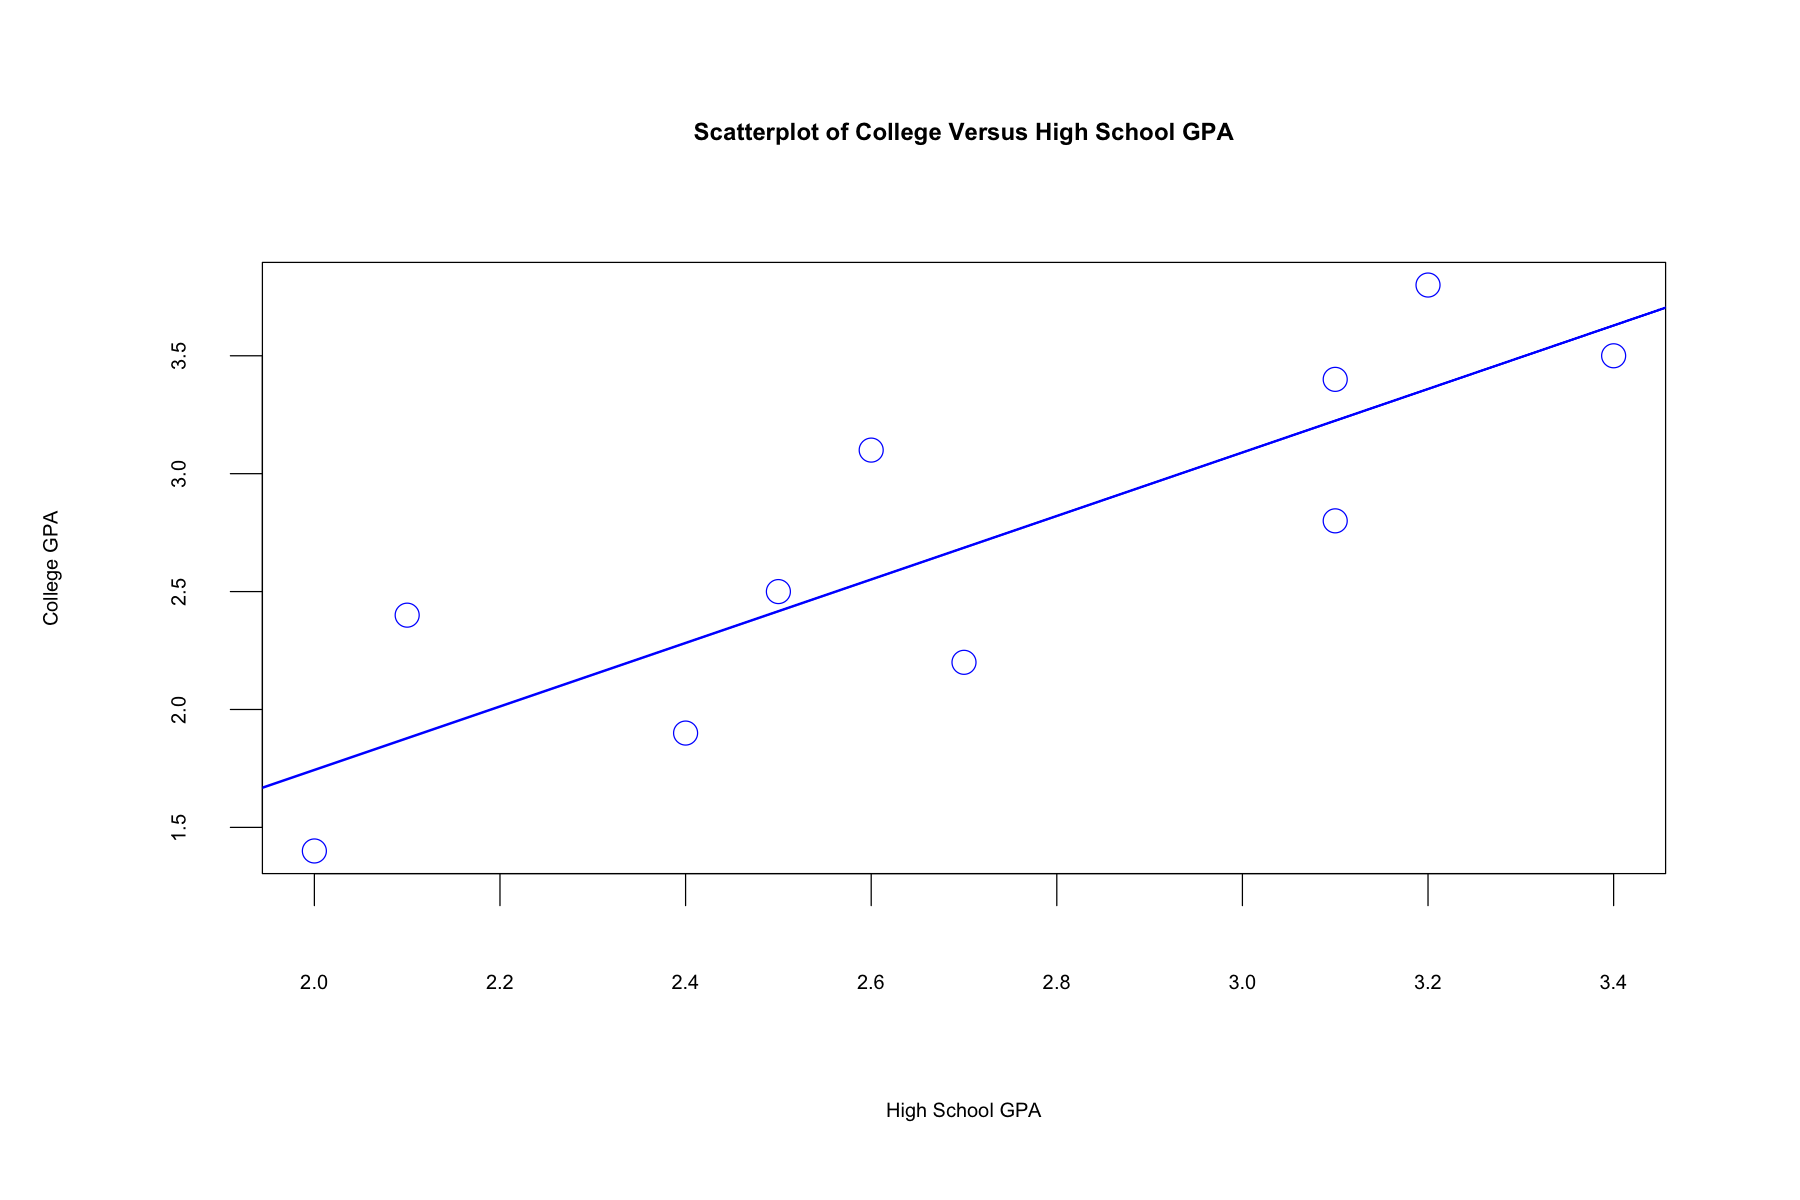

In [5]:
plot(x, Y, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
abline(model,col="blue",lwd=2)

** 3.5 ** Compute the sample correlation between $X$ and $\hat{u}_i$

In [6]:
cor(x,model$residuals)

[1] 2.307652e-16

#### 4.0 OLS Goodness of Fit

When building regression models, "goodness-of-fit" explains how closely our model of the data (i.e. the predictor variables) fits the outcome data. In other words, how much of the variation in an outcome can we explain with a particular model? 

** R-Squared ** is a measure commonly used for assessing model fit.  It can be understood as the proportion of variance in the outcome that can be accounted for by the model.

Looking at our simple bivariate model, we can extract R-squared as a measure of model fit in a number of ways. The easiest is simply to extract it from the lm object using summary(model)\$r.squared.

In [7]:
summary(model)$r.squared

[1] 0.7122061

Warning: We normally discourage students from using the summary command with lm objects.  The reason, as we will see later, is that summary makes a strong assumption called homoskedasticity, which is usually not justified.  However, it is ok to use the command in order to extract R-squared.

But we can also calculate R-squared from our data in a number of ways. Take a couple of minutes to manually calculate R-squared.

1. By squaring the correlation between X and Y.
2. By taking the ratio of the variance of the fitted values to the variance of Y.
3. By weighting the slope coefficient: $R^2 = \beta_1^2 \frac{var(X)}{var(Y)}$
 

In [16]:
# as squared bivariate correlation
cor(Y, x)^2 

# as ratio of variances
var(model$fitted)/var(Y)  

# as weighted regression coefficient
(coef(model)[2]/sqrt(cov(Y, Y)/cov(x, x)))^2

[1] 0.7122061

[1] 0.7122061

x 
0.7122061

#### 5.0 Adjusted R Square

The "Adjusted R-squared" is commonly used in place of the "regular" R-squared, which is sensitive to the number of independent variables in the model. In other words, as we put more variables into the model, R-squared increases even if those variables are unrelated to the outcome. 

Adjusted R-squared attempts to correct for this by deflating R-squared by the expected amount of increase from including irrelevant additional predictors. 

We can see this property of R-squared and Adjusted R-squared by adding a completely random variables unrelated to our other covariates or the outcome into our model and examine the impact on R-squared and Adjusted R-squared.

In [9]:
tmp1 <- rnorm(10, 0, 10)

Add this variable to your simple regression model, creating a new lm object, then observe what happens to R-squared.

In [10]:
model_adj <- lm(Y ~ x + tmp1 )
model_adj$coeff

(Intercept)           x        tmp1 
-0.89626054  1.33340637 -0.00822681

Now extract the adjusted R-squared from both models using lm\$adj.r.squared.  It may also go down, but by less than regular r-squared.

In [11]:
summary(model_adj)$r.squared
summary(model_adj)$adj.r.squared

[1] 0.7248955

[1] 0.6462942

#### 6.0 OLS: Issues to be Aware of

Unfortunately, the pitfalls of applying least squares are not often well understood by many of the people who attempt to apply it. What follows is a list of some of the biggest problems with using least squares regression in practice, along with some brief comments about how these problems may be mitigated or avoided

** Outliers: **  Least squares regression can perform very badly when some points in the training data have excessively large or small values for the dependent variable compared to the rest of the training data. The reason for this is that since the least squares method is concerned with minimizing the sum of the squared error, any training point that has a dependent value that differs a lot from the rest of the data can have a disproportionately large effect on the resulting constants that are being solved for.

**WARNING: Do not ever remove an observation just because it's an outlier.**

Returning to our example, let's add an outlier.

[1] 0.4986491

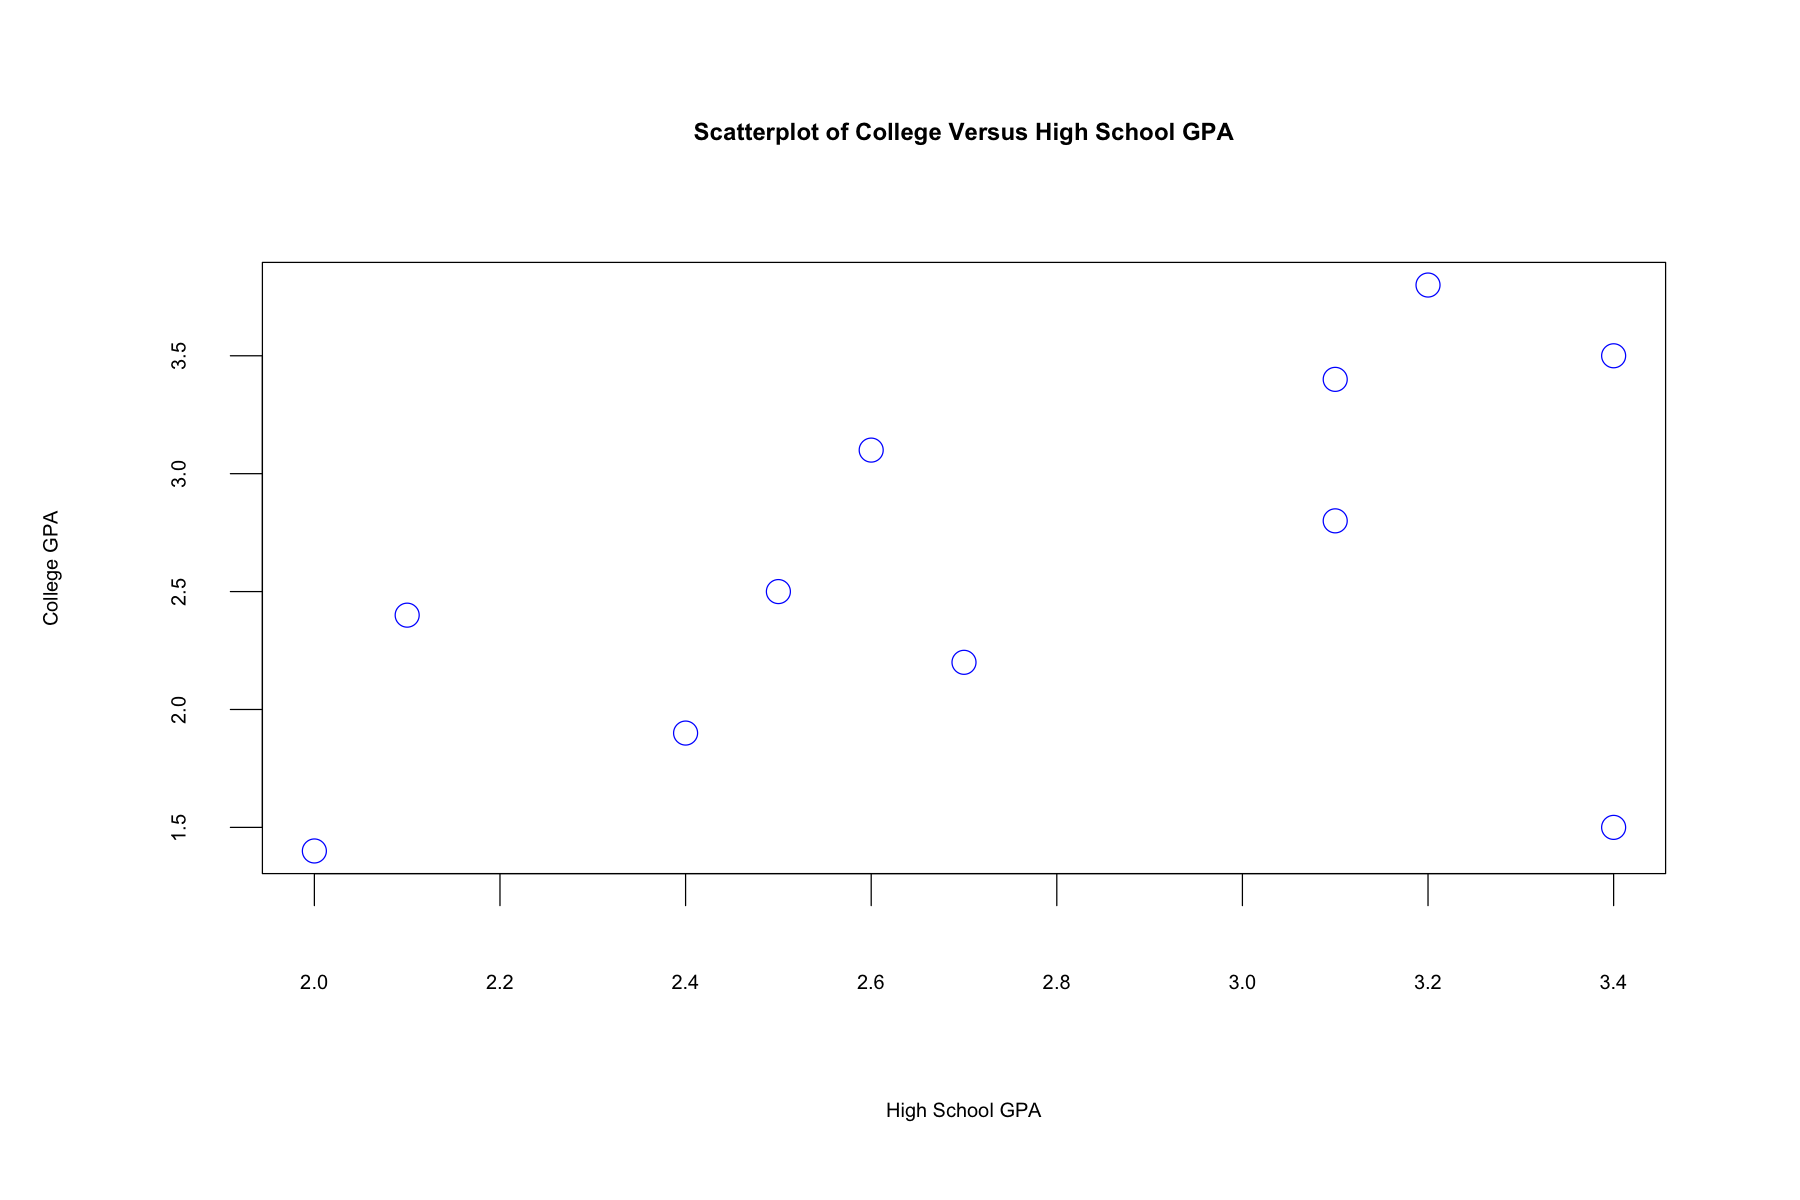

In [12]:
y_out <- c(Gpa$CollGPA,1.5)
x_out <- c(Gpa$HSGPA,3.4)
plot(x_out, y_out, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
cor(x_out,y_out)

We can see the outlier pulls the correlation off a lot.  Let's see what it does to the linear model.


In [13]:
model_out <- lm(y_out ~ x_out)
model_out$coef

(Intercept)       x_out 
  0.3483516   0.8087912

Let's see that scatterplot again with our new regression line.

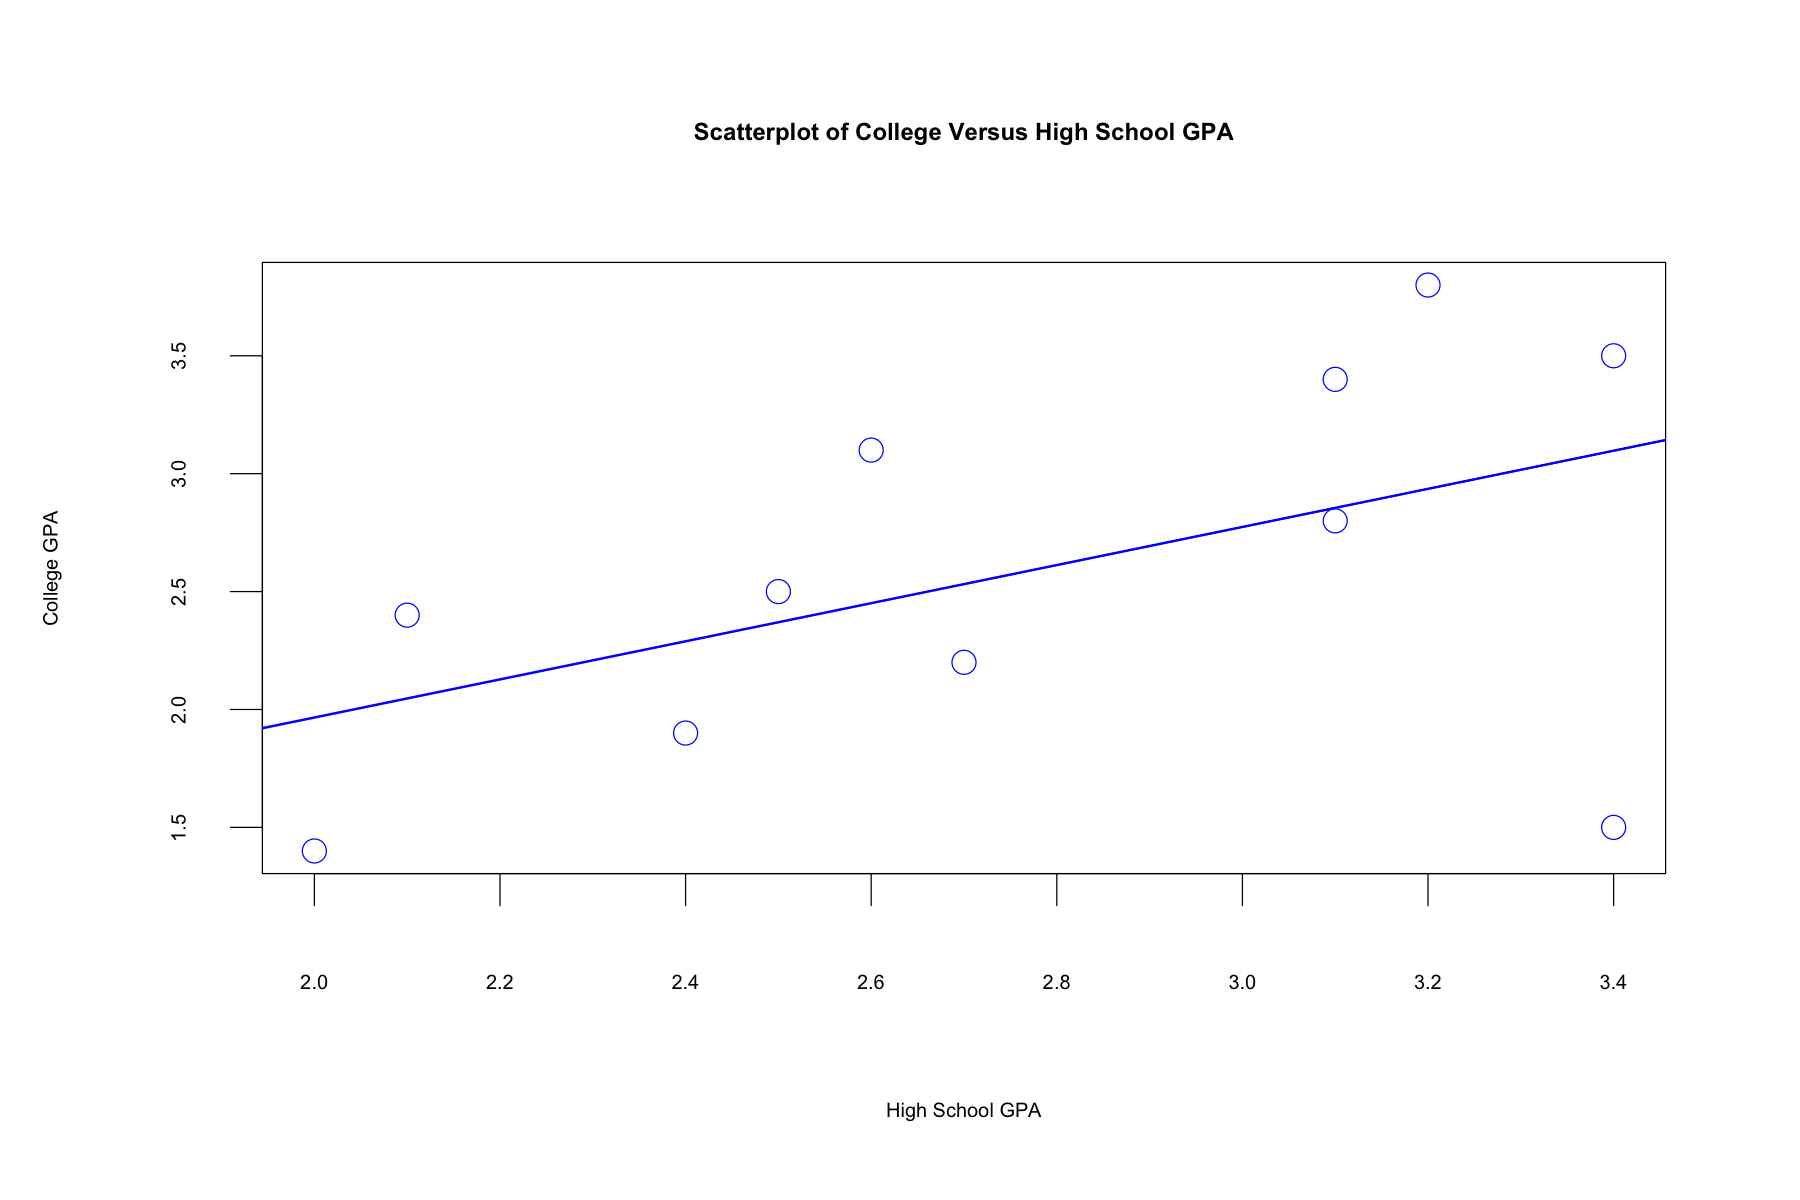

In [14]:
plot(x_out, y_out, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
abline(model_out,col="blue",lwd=2)

**WARNING: Do not ever remove an observation just because it's an outlier.**

** Non-Linearities ** All linear regression methods (including, of course, least squares regression), suffer from the major drawback that in reality most systems are not linear.

Let's take another dataset that is clearly non-linear.

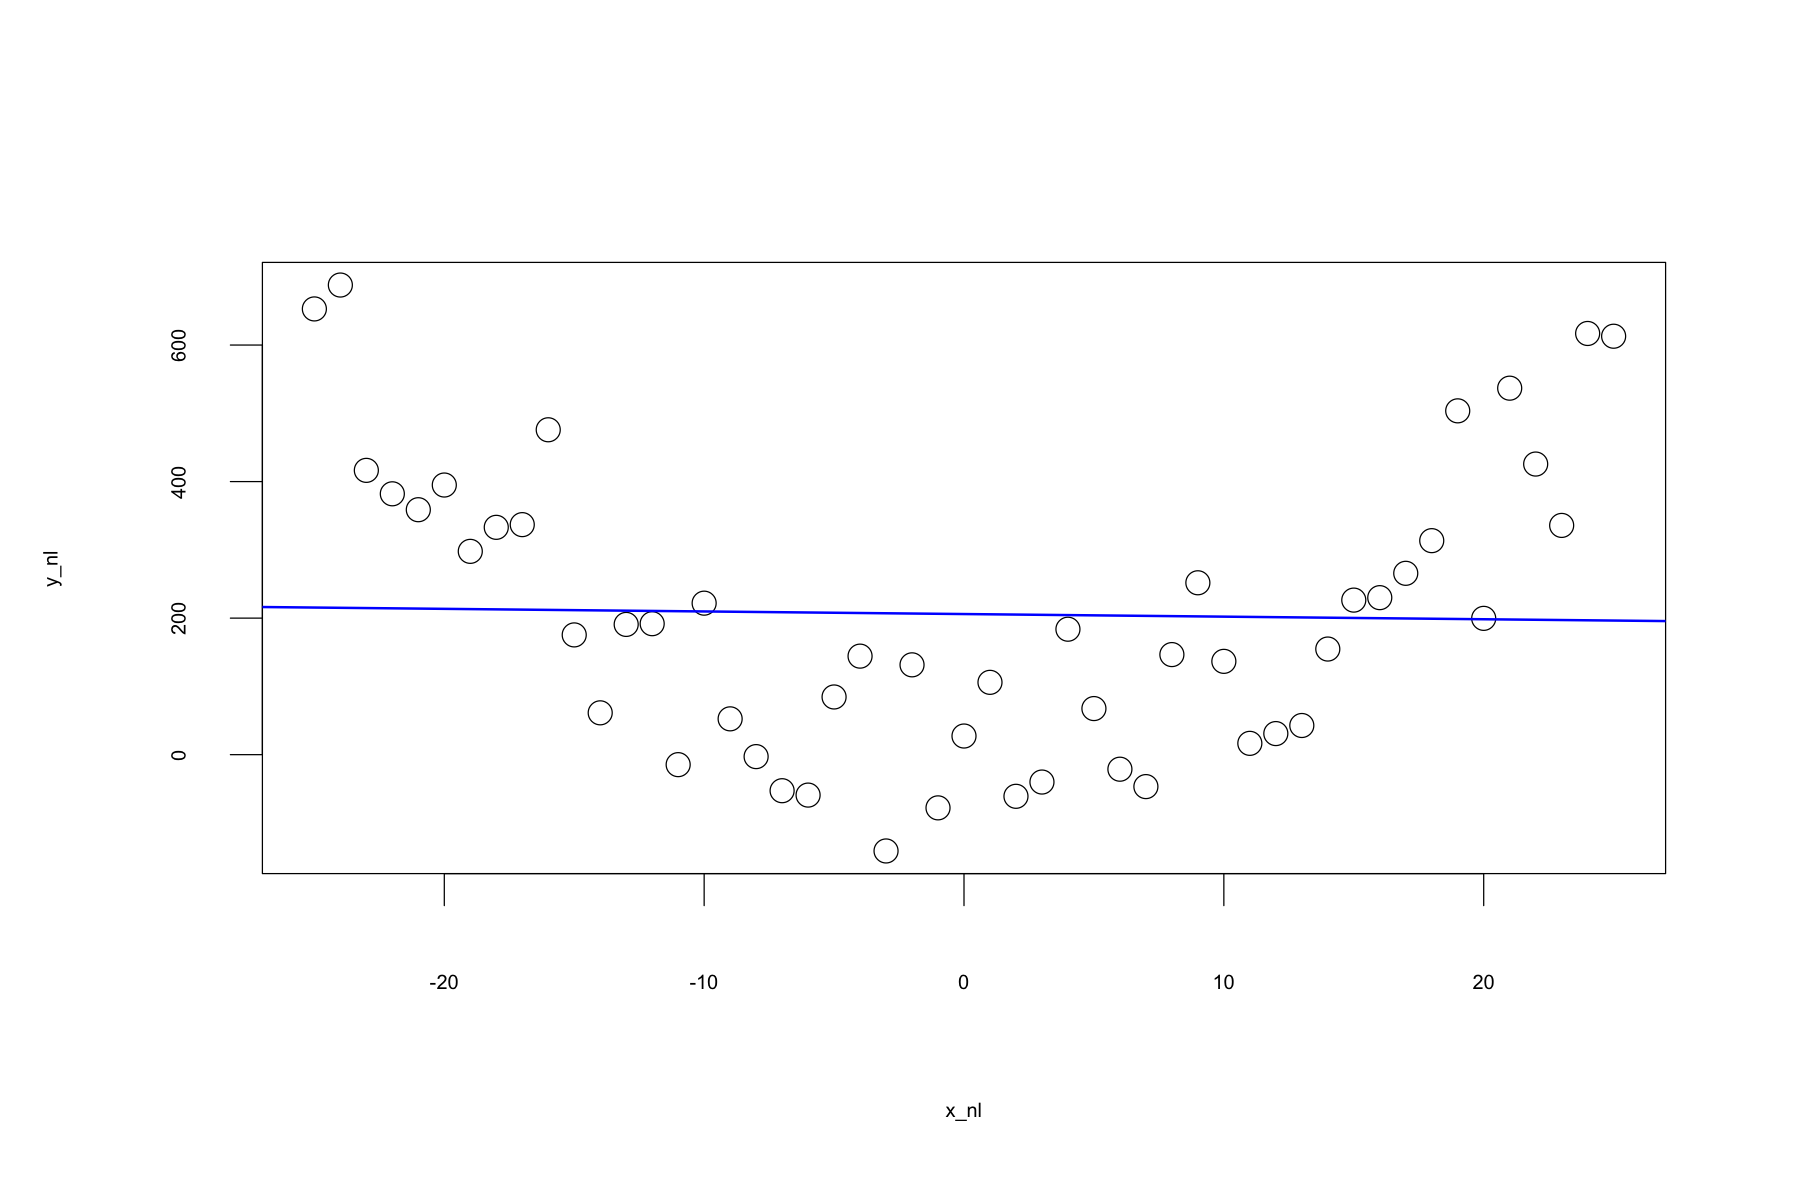

In [15]:
x_nl<-seq(-25,25,1)
y_nl<-x_nl^2+rnorm(51,0,100)
model_nl<-lm(y_nl ~ x_nl)
plot(x_nl,y_nl)
abline(model_nl, col = "blue" , lwd = 2 )

There's definitely a relationship here, but we will need to do a transformation prior to OLS.